Imports


In [1]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import SGDRegressor
import pickle


Processing Images

In [2]:
#Path to the raw images
path_unknown_raw = "C:\\Users\\Sameed\\Desktop\\ML_Overall_Work\\Age Identify\\Dataset\\UTKFace"

#Get the names of all the images
images_unknown = os.listdir(path_unknown_raw)

#Store the paths of all the cropped images we will save later
paths_unknown_cropped = []

img_dim = 32


In [3]:
unknown_ages = []
features = []

#Store all the paths for the unknown images
for unknowns in enumerate(images_unknown):
    
    age = ""
    for i in range(0,6):
        if(unknowns[1][i] == "_"):
            break
        else:
            age += unknowns[1][i]

    unknown_ages.append(int(age))

    path = path_unknown_raw + "\\" + unknowns[1]
    image = cv2.imread(path)

    img_resize = cv2.resize(image, (img_dim,img_dim))
    features.append(img_resize.flatten())


Linear Regression

In [4]:
x = np.array(features)
y = np.array(unknown_ages)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=10)

In [5]:
reg = LinearRegression()
reg.fit(x_train, y_train)



LinearRegression()

In [6]:
y_pred_ls = reg.predict(x_test)
y_pred_ls2 = reg.predict(x_train)

r2_test = r2_score(y_test, y_pred_ls)
mse_test = mean_squared_error(y_test, y_pred_ls)

r2_val = r2_score(y_train, y_pred_ls2)
mse_val = mean_squared_error(y_train, y_pred_ls2)

print("Intercept =", reg.intercept_)
print("Coef =", reg.coef_)

print(f"Testing: \n R2 = {r2_test} \n MSE = {mse_test} \n\n Validation: \n R2 = {r2_val} \n Mse = {mse_val}" )


Intercept = 36.75867670320579
Coef = [-0.00272599 -0.02222004  0.03986795 ...  0.0026557  -0.00301925
 -0.01317371]
Testing: 
 R2 = 0.5462346146913211 
 MSE = 182.00822217747725 

 Validation: 
 R2 = 0.6701388323868387 
 Mse = 129.7971491705251


SGD Regressor

In [13]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5,random_state = 6)

regressor = SGDRegressor(loss="huber",eta0=0.00001, power_t=0.15)
regressor.fit(x_train, y_train)


SGDRegressor(eta0=1e-05, loss='huber', power_t=0.15)

In [14]:

y_pred_sgd = regressor.predict(x_test)
y_pred_sgd2 = regressor.predict(x_train)

mse = mean_squared_error(y_test, y_pred_sgd)
n_r2 = r2_score(y_test, y_pred_sgd)

mse2 = mean_squared_error(y_train, y_pred_sgd2)
n_r22 = r2_score(y_train, y_pred_sgd2)

print("intercept=", regressor.intercept_)
print("coef=", regressor.coef_)


print(f"Testing: \n R2 = {n_r2} \n MSE = {mse} \n\n Validation: \n R2 = {n_r22} \n Mse = {mse2}" )


intercept= [0.00272514]
coef= [ 0.00506827  0.00440799  0.00554138 ... -0.00024219 -0.00307015
 -0.0027111 ]
Testing: 
 R2 = 0.4782005208118044 
 MSE = 203.53255959473628 

 Validation: 
 R2 = 0.5551976177523814 
 Mse = 177.2236467402185


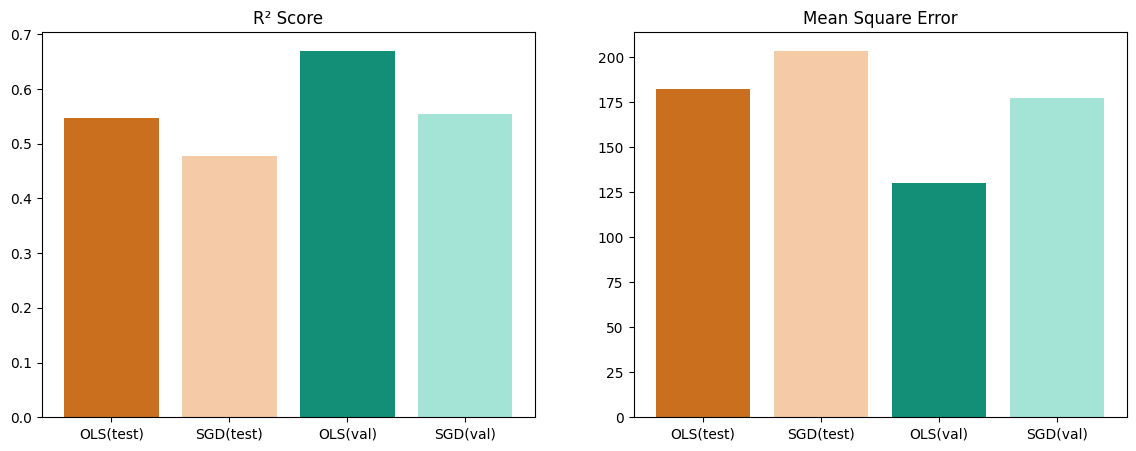

In [79]:
# print("OLS - \n")
# print(f"Testing: \n R2 = {r2_test} \n MSE = {mse_test} \n\n Validation: \n R2 = {r2_val} \n Mse = {mse_val}" )

# print("\nSGD - \n")
# print(f"Testing: \n R2 = {n_r2} \n MSE = {mse} \n\n Validation: \n R2 = {n_r22} \n Mse = {mse2}" )

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

labels = ["OLS(test)","SGD(test)","OLS(val)","SGD(val)"]
scores = [r2_test,n_r2,r2_val,n_r22]
colors = ['#CA6F1E', '#F5CBA7','#148F77', '#A3E4D7']
ax1.bar(labels,scores,color = colors)


labels = ["OLS(test)","SGD(test)","OLS(val)","SGD(val)"]
scores = [mse_test,mse,mse_val,mse2]
colors = ['#CA6F1E', '#F5CBA7','#148F77', '#A3E4D7']
ax2.bar(labels,scores,color = colors)

ax1.set_title('R\u00b2 Score')
ax2.set_title('Mean Square Error')



plt.show()


Models Dump

In [110]:
pickle.dump(reg, open('OLS.pkl', 'wb'))
pickle.dump(regressor, open('SGD.pkl', 'wb'))
